In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 3
## Comparando Variables Categoricas

Para este ejercicio, vamos a utilizar datos de propinas. En particular, cuanto recibio cada día de la semana y por quién.

In [2]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
males = data[data["sex"]=="Male"]\
          .groupby("day")["tip"].sum().reset_index()
females = data[data["sex"]=="Female"]\
          .groupby("day")["tip"].sum().reset_index()

females

,day,tip
0,Thur,82.42
1,Fri,25.03
2,Sat,78.45
3,Sun,60.61


¡Recuerda, a partir de ahora, siempre agregar títulos adecuados y otros elementos que den claridad a tus gráficos!

### 1. Haz un gráfico de barras apilado. En el eje X, pon el día de la semana, y en el eje Y, las propinas. 

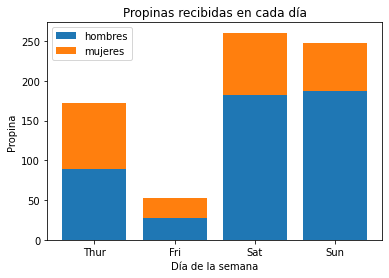

In [4]:
plt.bar(males["day"], males["tip"], label ='hombres')
plt.bar(females["day"], females["tip"], bottom=males["tip"], label = 'mujeres')
plt.title('Propinas recibidas en cada día')
plt.xlabel("Día de la semana")
plt.ylabel("Propina")
plt.legend()
plt.show()

2. Repite el el gráfico anterior, pero esta vez, investiga cómo se hace y cambia los colores default por otros.

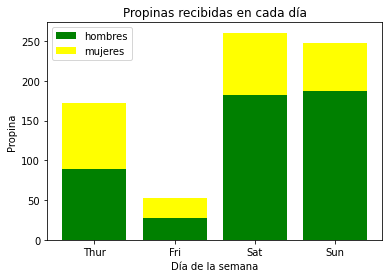

In [5]:
plt.bar(males["day"], males["tip"], label ='hombres', color = 'green')
plt.bar(females["day"], females["tip"], bottom=males["tip"], label = 'mujeres', color = 'yellow')
plt.title('Propinas recibidas en cada día')
plt.xlabel("Día de la semana")
plt.ylabel("Propina")
plt.legend()
plt.show()

3. Usa los colores del ejercicio anterior, pero esta vez, usa los datos en porcentaje y genera un gráfico de barras.

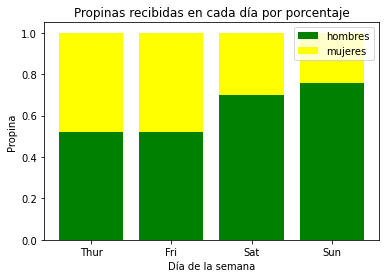

In [6]:
malesarr = np.array(males["tip"])
femalesarr = np.array(females["tip"])
malesp = malesarr / (malesarr + femalesarr)
femalesp = femalesarr / (malesarr + femalesarr)
plt.bar(males["day"], malesp, label ='hombres', color = 'green')
plt.bar(females["day"], femalesp, bottom=malesp, label = 'mujeres', color = 'yellow')
plt.title('Propinas recibidas en cada día por porcentaje')
plt.xlabel("Día de la semana")
plt.ylabel("Propina")
plt.legend()
plt.show()

4. Genera un gráfico de área para representar los datos anteriores. Usa los dos mismos colores que haz usado en los ejercicios anteriores.

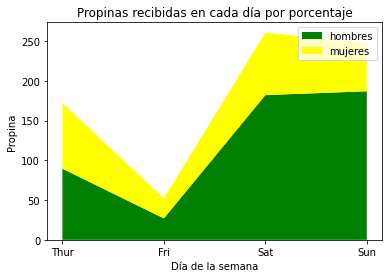

In [7]:
plt.stackplot(males['day'], males['tip'], females['tip'], colors = ["green","yellow"])

plt.title('Propinas recibidas en cada día por porcentaje')
plt.xlabel("Día de la semana")
plt.ylabel("Propina")

plt.legend(["hombres", "mujeres"])

plt.show()

5. Suma los datos de _males_ y _females_ para tener las propinas totales por día de la semana. Genera un gráfico de waffle para representar esa data. En vez de cuadros, usa alguna otra forma.

Tip: puedes consultar https://fontawesome.com/search para ver formas que puedes usar.

In [8]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from pywaffle import Waffle

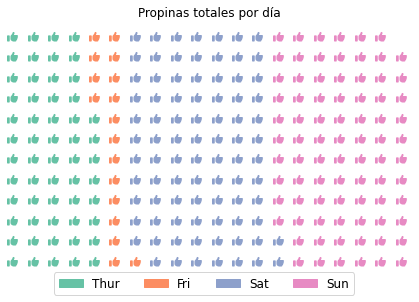

In [10]:
totaltip = malesarr+femalesarr
valores = {males['day'][i]:totaltip[i] for i in range(0, len(totaltip))}
plt.figure(
    FigureClass = Waffle,
    rows = 12,
    columns = 20,
    values = valores,
    legend = {"loc":"lower left", 'bbox_to_anchor': (0.1, -0.15), 'ncol':len(totaltip), 'fontsize':12},
    icons = 'thumbs-up') 
plt.title("Propinas totales por día")

plt.show() 